<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E8%96%88%E8%90%83%E5%BC%8F%E5%AD%B8%E7%BF%92/ensemble_%E7%9B%B4%E8%A7%80%E7%90%86%E8%A7%A3%E8%96%88%E8%90%83%E5%BC%8F%E5%AD%B8%E7%BF%92%E7%9A%84%E5%84%AA%E5%8B%A21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install wget

In [2]:
#下載檔案
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

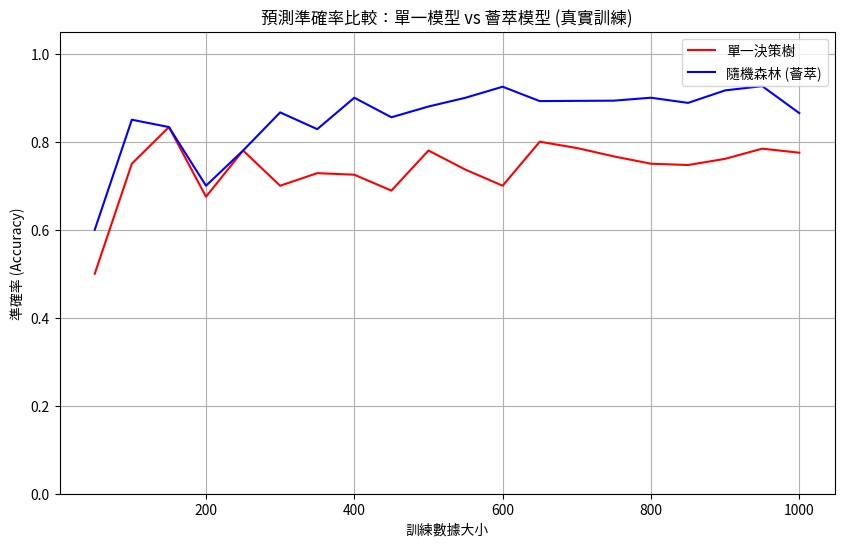

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # 使用分類樹作為單一模型
from sklearn.ensemble import RandomForestClassifier  # 使用隨機森林分類器
from sklearn.metrics import accuracy_score  # 使用準確率作為評估指標
from sklearn.datasets import make_classification  # 使用 make_classification 生成資料
import matplotlib as mpl
from matplotlib.font_manager import fontManager



fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")
use_chinese_font = True


# 1. 產生模擬資料集 (Classification)
np.random.seed(42)
data_size = 1000  # 總資料量
# 生成分類資料集
X, y = make_classification(n_samples=data_size, n_features=20, n_informative=15, random_state=42)

# 2. 針對不同訓練資料量，計算模型準確率
# 訓練資料量從 50 到 data_size (1000)，每次增加 50，模仿範例結構
training_sizes = np.arange(50, data_size + 1, 50)
single_tree_accuracies = []
random_forest_accuracies = []

# 設定測試集佔當前可用資料的比例，模仿範例的 test_size=0.2
test_set_ratio = 0.2

for train_size in training_sizes:
    # 選擇當前訓練資料量對應的資料子集
    X_subset = X[:train_size]
    y_subset = y[:train_size]

    # 將當前資料子集分割成訓練集和測試集
    # 注意：這裡的測試集是從當前子集中分割出來的，其大小和內容會隨著 train_size 變化
    # 為了分類問題，使用 stratify=y_subset 確保訓練集和測試集的類別分佈相似
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X_subset, y_subset, test_size=test_set_ratio, random_state=42, stratify=y_subset
        )
    except ValueError as e:
        # 如果當前子集太小，無法進行分割 (例如只有一個類別或樣本數不足)
        print(f"警告：訓練資料量 {train_size} 過小，無法進行分割。跳過此訓練量。錯誤訊息：{e}")
        single_tree_accuracies.append(np.nan) # 記錄為 NaN
        random_forest_accuracies.append(np.nan) # 記錄為 NaN
        continue # 跳過本次迴圈

    # 訓練單一決策樹分類器
    single_tree = DecisionTreeClassifier(random_state=42)
    single_tree.fit(X_train, y_train)
    single_tree_pred = single_tree.predict(X_test)
    single_tree_accuracy = accuracy_score(y_test, single_tree_pred)
    single_tree_accuracies.append(single_tree_accuracy)

    # 訓練隨機森林 (薈萃模型) 分類器
    random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
    random_forest.fit(X_train, y_train)
    random_forest_pred = random_forest.predict(X_test)
    random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
    random_forest_accuracies.append(random_forest_accuracy)

# 3. 繪製圖表
plt.figure(figsize=(10, 6))  # 調整圖形大小

# 過濾掉因資料量過小而產生的 NaN 值
valid_indices = ~np.isnan(single_tree_accuracies) & ~np.isnan(random_forest_accuracies)

plt.plot(np.array(training_sizes)[valid_indices], np.array(single_tree_accuracies)[valid_indices], 'r-', label='單一決策樹')
plt.plot(np.array(training_sizes)[valid_indices], np.array(random_forest_accuracies)[valid_indices], 'b-', label='隨機森林 (薈萃)')


plt.title('預測準確率比較：單一模型 vs 薈萃模型 (真實訓練)')
plt.xlabel('訓練數據大小')
plt.ylabel('準確率 (Accuracy)')  # 使用準確率作為指標名稱


plt.grid(True)
plt.legend()
plt.ylim(0, 1.05) # 準確率介於 0 到 1 之間，稍微超出範圍讓圖形更好看

# 4. 儲存圖表
plt.savefig('ensemble_vs_single_model_classification_accuracy.png')
plt.show()